In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
os.chdir('/Users/sebas/projects/metabolomics')
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [6]:
import matplotlib.pyplot as plt
import dill

In [7]:
ls ./notebooks/discovery_search/results

all_tanimoto_ms2deepscore.pkl
modified_cosine_casmi_results_analog_discovery_unknwon_compounds.pkl
modified_cosine_results_analog_discovery_unknwon_compounds.pkl
ms2deepscore_casmi_results_analog_discovery_unknwon_compounds.pkl
ms2deepscore_results_analog_discovery_unknwon_compounds.pkl
simba_100_million_results_analog_discovery_unknwon_compounds.pkl
simba_150_millions_results_analog_discovery_unknwon_compounds.pkl
simba_2_results_analog_discovery_unknwon_compounds.pkl
simba_casmi_100_million_results_analog_discovery_unknwon_compounds.pkl
simba_casmi_1024_10_results_analog_discovery_unknwon_compounds.pkl
simba_casmi_more_epochs_day3_results_analog_discovery_unknwon_compounds.pkl
simba_casmi_more_epochs_results_analog_discovery_unknwon_compounds.pkl
simba_casmi_new_preprocessing_results_analog_discovery_unknwon_compounds.pkl
simba_casmi_results_analog_discovery_unknwon_compounds.pkl
simba_exhaustive_128n_results_analog_discovery_unknwon_compounds.pkl
simba_exhaustive_sampled_128n_result

In [8]:
format_file_unknown = "./notebooks/discovery_search/results/{}_results_analog_discovery_unknwon_compounds.pkl"
format_file_rankings = "./notebooks/discovery_search/results/{}_results_analog_discovery_ranking.pkl"

In [27]:
similarity_names= ['tanimoto_similarity',
                   'spec2vec',
                   #'simba',
                   #'simba_100_million',
                   'simba_more_epochs_day3',
                   #'simba_150_millions',
                   # 'simba_new_preprocessing',
                   #'simba_exhaustive_128n',
                   'simba_exhaustive_sampled_128n',
                   'simba_exhaustive_sampled_128n_with_pretrained',
                   #'ms2deepscore',
                   #'modified_cosine',
                   #'tanimoto_similarity_casmi',
                   #'spec2vec_casmi',
                   #'simba_casmi_more_epochs_day3',
                   # 'simba_casmi_new_preprocessing',
                   # 'ms2deepscore_casmi',
                   #'simba_no_sim1_10millions',
                   #'simba_pretrain_low_range',
                   #'simba_2',
                   #'simba_not_bin_sim_1_10_million',
                   #'simba_no_identity',
                   ]

## unknown compounds

In [28]:
results_unknown={}
for s in similarity_names:
    file_path = format_file_unknown.format(s)
    with open(file_path, 'rb') as f:
        results_unknown[s] = dill.load(f)

In [29]:
## plot mces

In [30]:
# Create a box plot
tani_list=[]
mces_list=[]
labels_list=[]
for s in similarity_names:
    labels_list.append(s)
    tani= [m for m in results_unknown[s]['tanimoto_retrieved'] if m is not None]
    mces= [m for m in results_unknown[s]['mces_retrieved'] if m is not None]
    tani_list.append(tani)
    mces_list.append(mces)

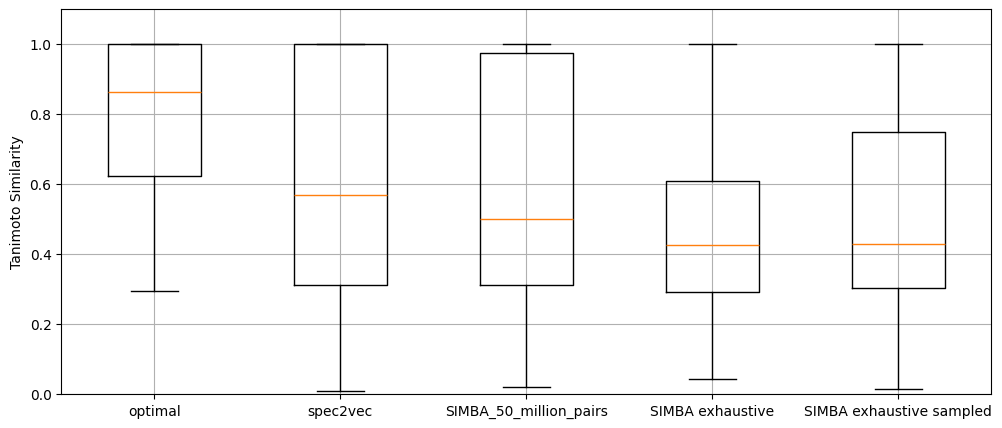

In [51]:
plt.figure(figsize=(12,5))
#plt.boxplot(tani_list, labels=similarity_names)
plt.boxplot(tani_list, labels=['optimal', 'spec2vec','SIMBA_50_million_pairs', 'SIMBA exhaustive', 'SIMBA exhaustive sampled'])
#plt.boxplot(tani_list, labels=['tanimoto', 'spec2vec', 'simba','ms2deepscore',''])
#plt.boxplot(, labels=labels_list)

plt.ylim([0,1.1])
plt.ylabel('Tanimoto Similarity')
plt.title('')
plt.grid()

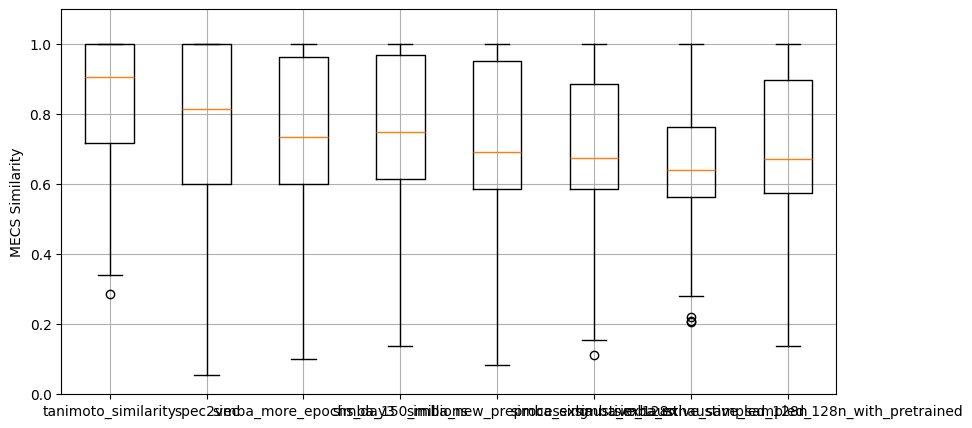

In [26]:
plt.figure(figsize=(10,5))
plt.boxplot(mces_list, labels=similarity_names)
#plt.boxplot(, labels=labels_list)

plt.ylim([0,1.1])
plt.ylabel('MECS Similarity')
plt.title('')
plt.grid()

## Rankings

In [53]:
results_rankings={}
for s in similarity_names:
    file_path = format_file_rankings.format(s)
    with open(file_path, 'rb') as f:
        results_rankings[s] = dill.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './notebooks/discovery_search/results/tanimoto_similarity_results_analog_discovery_ranking.pkl'

In [ ]:
for s in similarity_names:
    plt.plot(results_rankings[s]['rankings_x'], results_rankings[s]['rankings_y'], marker='*', label=s)
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.ylim([0,1])
plt.grid()
plt.legend()

In [88]:
68303299801**0.5

261349.0

In [93]:
import numpy as np
a=np.zeros((3, 3), dtype=np.float16)

In [94]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float16)

In [95]:
a[0,0]=1

In [96]:
a

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float16)

In [97]:
a[1,1]=666

In [98]:
a

array([[  1.,   0.,   0.],
       [  0., 666.,   0.],
       [  0.,   0.,   0.]], dtype=float16)

In [138]:
from torch.utils.data import WeightedRandomSampler

weights_tr = [0.1, 0.2, 0.3, 0.4]  # Some weights

train_sampler = WeightedRandomSampler(
    weights=weights_tr, num_samples=3, replacement=True
)

# Now, if you delete weights_tr
del weights_tr

# It will not affect train_sampler
for index in train_sampler:
    print(index)

3
3
3


In [45]:
freq=[192235192,
381735986,
191719062,
71400948,
25104550,
7324840,
1996170,
635518,
265134,
194200]
import numpy as np
ranges= np.arange(0,10)

In [46]:
#ranges=ranges*0.1

Text(0, 0.5, 'freq')

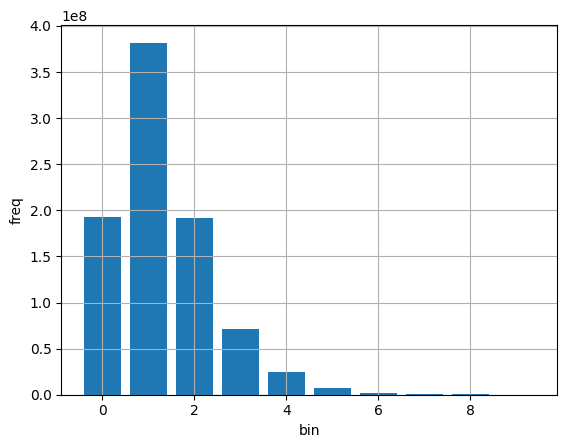

In [50]:
plt.bar(ranges, freq)
plt.xlabel('bin')
plt.grid()
plt.ylabel('freq')